# Importing libraries and Dataset

## Importing libraries

In [2]:
pip install dmba

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 24.4 MB/s eta 0:00:00


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from dmba import classificationSummary
from sklearn.metrics import classification_report

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling  import RandomUnderSampler

Colab environment detected.


## Reading Dataset

---



In [121]:
X =pd.read_csv("heart.csv")
y=pd.read_csv("heart_y.csv")

In [122]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   age         303 non-null    int64  
 2   sex         303 non-null    int64  
 3   cp          303 non-null    int64  
 4   trestbps    303 non-null    int64  
 5   chol        303 non-null    int64  
 6   fbs         303 non-null    int64  
 7   restecg     303 non-null    int64  
 8   thalach     303 non-null    int64  
 9   exang       303 non-null    int64  
 10  oldpeak     303 non-null    float64
 11  slope       303 non-null    int64  
 12  ca          299 non-null    float64
 13  thal        301 non-null    float64
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


In [123]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Unnamed: 0  303 non-null    int64
 1   num         303 non-null    int64
dtypes: int64(2)
memory usage: 4.9 KB


In [124]:
df = pd.merge(X, y, on='Unnamed: 0', how='inner')
df.head()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [125]:
columns_unwanted = ['Unnamed: 0']
df = df.drop(columns= columns_unwanted, axis=1)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


### Handling Missing Values

In [126]:
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64


In [127]:
df= df.dropna()

In [128]:
df['num'].value_counts() # its imbalanced so we need to resample the dataset

num
0    160
1     54
2     35
3     35
4     13
Name: count, dtype: int64

In [129]:
df['num'] = df['num'].apply(lambda x: 1 if x > 0 else x)

In [130]:
df['num'].value_counts() # its imbalanced so we need to resample the dataset

num
0    160
1    137
Name: count, dtype: int64

In [131]:
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64


## Data Analysis

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    int64  
 1   sex       297 non-null    int64  
 2   cp        297 non-null    int64  
 3   trestbps  297 non-null    int64  
 4   chol      297 non-null    int64  
 5   fbs       297 non-null    int64  
 6   restecg   297 non-null    int64  
 7   thalach   297 non-null    int64  
 8   exang     297 non-null    int64  
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    int64  
 11  ca        297 non-null    float64
 12  thal      297 non-null    float64
 13  num       297 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 34.8 KB


In [ ]:
df.shape


(297, 14)

In [ ]:
df.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,4.730640,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,1.938629,0.499340
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


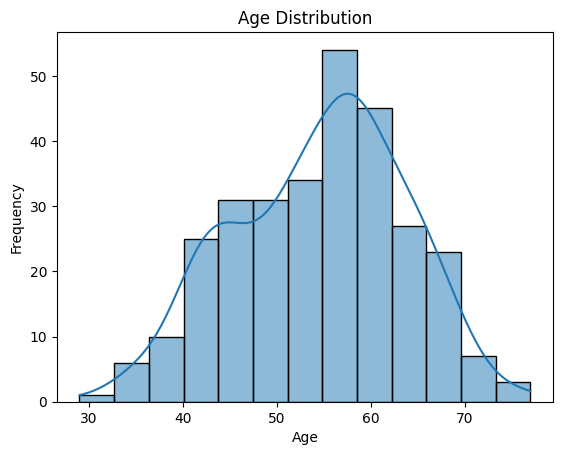

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Same assumptions apply
sns.histplot(df['age'],kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# plot the histogram of age column using plotly and coloring this by sex
import plotly.express as px
fig = px.histogram(data_frame=df, x='age', color= 'sex')
fig.show()

In [ ]:
df['sex'].value_counts()

sex
1    201
0     96
Name: count, dtype: int64

In [ ]:
#Exploring CP (Chest Pain) column
# value count of cp column
df['cp'].value_counts()

cp
4    142
3     83
2     49
1     23
Name: count, dtype: int64

<Axes: xlabel='cp', ylabel='count'>

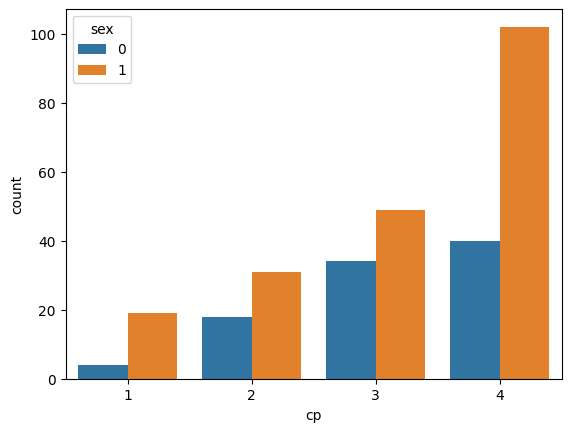

In [ ]:
sns.countplot(df, x='cp', hue= 'sex')


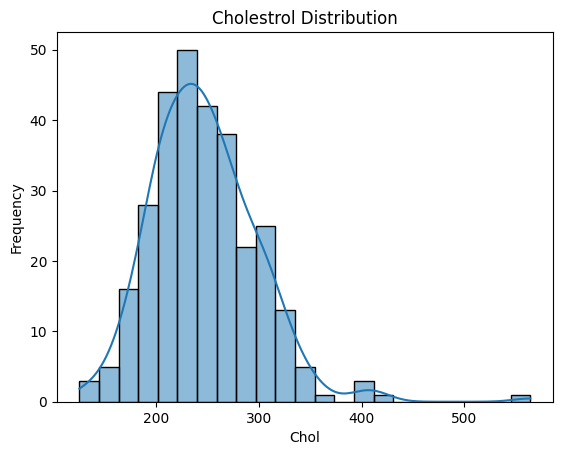

In [ ]:
sns.histplot(df['chol'],kde=True)
plt.title('Cholestrol Distribution')
plt.xlabel('Chol')
plt.ylabel('Frequency')
plt.show()

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [ ]:
df['slope'].value_counts()

slope
1    139
2    137
3     21
Name: count, dtype: int64

In [ ]:
df['thal'].value_counts()

thal
3.0    164
7.0    115
6.0     18
Name: count, dtype: int64

Column Descriptions:¶

•	age (Age of the patient in years)
•	origin (place of study)
•	sex (Male/Female)
•	cp chest pain type
•	typical angina.
•	atypical angina.
•	non-anginal.
•	asymptomatic.
•	trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
•	chol (serum cholesterol in mg/dl)
•	fbs (if fasting blood sugar > 120 mg/dl)
•	restecg (resting electrocardiographic results)
•	Values: [normal, stt abnormality, lv hypertrophy]
•	thalach: maximum heart rate achieved
•	exang: exercise-induced angina (True/ False)
•	oldpeak: ST depression induced by exercise relative to rest
•	slope: the slope of the peak exercise ST segment
•	ca: number of major vessels (0-3) colored by fluoroscopy
•	thal:[normal; fixed defect; reversible defect]
•	num: the predicted attribute



In [ ]:
df['restecg'].value_counts()

restecg
0    147
2    146
1      4
Name: count, dtype: int64

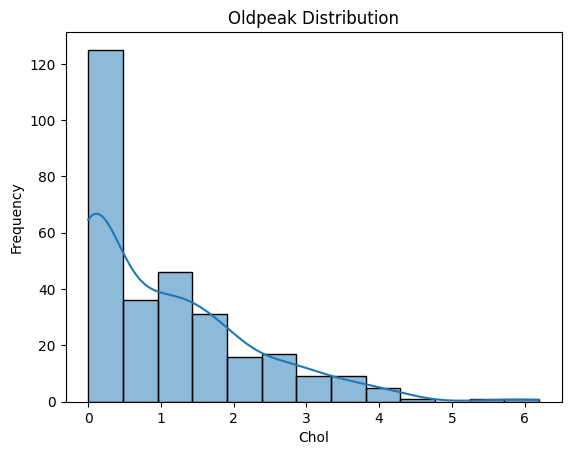

In [ ]:

sns.histplot(df['oldpeak'],kde=True)
plt.title('Oldpeak Distribution')
plt.xlabel('Chol')
plt.ylabel('Frequency')
plt.show()

In [ ]:
df['exang'].value_counts()

exang
0    200
1     97
Name: count, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    int64  
 1   sex       297 non-null    int64  
 2   cp        297 non-null    int64  
 3   trestbps  297 non-null    int64  
 4   chol      297 non-null    int64  
 5   fbs       297 non-null    int64  
 6   restecg   297 non-null    int64  
 7   thalach   297 non-null    int64  
 8   exang     297 non-null    int64  
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    int64  
 11  ca        297 non-null    float64
 12  thal      297 non-null    float64
 13  num       297 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 34.8 KB


## Creating training and test data

In [38]:
df['ca'] = df['ca'].astype(int)
df['thal'] = df['thal'].astype(int)

In [39]:
columns= ['sex','trestbps','chol', 'fbs','restecg','thalach','age','slope','num']

In [40]:
X= df.drop(columns =columns)
y = df['num']

In [41]:
train_X, valid_X,train_y,valid_y = train_test_split(X,y,
                                                     test_size=0.2, random_state =0 )


In [42]:
overs = SMOTE()
unders= RandomUnderSampler(sampling_strategy='majority')

X_train_OS, y_train_OS= overs.fit_resample(train_X, train_y)

X_train_US, y_train_US = unders.fit_resample(train_X,train_y)

In [43]:
print(train_X.info())
print()
print(valid_X.info())
print()
print(train_y.info())
print()
print(valid_y.info())
print()

<class 'pandas.core.frame.DataFrame'>
Index: 237 entries, 286 to 174
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cp       237 non-null    int64  
 1   exang    237 non-null    int64  
 2   oldpeak  237 non-null    float64
 3   ca       237 non-null    int64  
 4   thal     237 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 11.1 KB
None

<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, 112 to 295
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cp       60 non-null     int64  
 1   exang    60 non-null     int64  
 2   oldpeak  60 non-null     float64
 3   ca       60 non-null     int64  
 4   thal     60 non-null     int64  
dtypes: float64(1), int64(4)
memory usage: 2.8 KB
None

<class 'pandas.core.series.Series'>
Index: 237 entries, 286 to 174
Series name: num
Non-Null Count  Dtype
--------------  -----
237 non-null    int64
dtyp

In [44]:
print(train_y.value_counts())
print()
print(y_train_OS.value_counts())
print()
print(y_train_US.value_counts())
print()

num
0    130
1    107
Name: count, dtype: int64

num
1    130
0    130
Name: count, dtype: int64

num
0    107
1    107
Name: count, dtype: int64



# Models

## BaggingClassifier

In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier

In [46]:
BG = BaggingClassifier(DecisionTreeClassifier(random_state = 1),
                       n_estimators = 100, random_state = 1)
BG.fit(train_X, train_y)

pred2 = BG.predict(valid_X)
print(classification_report(valid_y, pred2))

              precision    recall  f1-score   support

           0       0.73      0.80      0.76        30
           1       0.78      0.70      0.74        30

    accuracy                           0.75        60
   macro avg       0.75      0.75      0.75        60
weighted avg       0.75      0.75      0.75        60



In [47]:
BG1 = BaggingClassifier(DecisionTreeClassifier(random_state = 1),
                       n_estimators = 100, random_state = 1)
BG1.fit(X_train_OS, y_train_OS)

out1 = BG1.predict(valid_X)
print(classification_report(valid_y, out1))

              precision    recall  f1-score   support

           0       0.76      0.87      0.81        30
           1       0.85      0.73      0.79        30

    accuracy                           0.80        60
   macro avg       0.81      0.80      0.80        60
weighted avg       0.81      0.80      0.80        60



In [48]:
BG2 = BaggingClassifier(DecisionTreeClassifier(random_state = 1),
                       n_estimators = 100, random_state = 1)
BG2.fit(X_train_US, y_train_US)

out2 = BG2.predict(valid_X)
print(classification_report(valid_y, out2))

              precision    recall  f1-score   support

           0       0.76      0.87      0.81        30
           1       0.85      0.73      0.79        30

    accuracy                           0.80        60
   macro avg       0.81      0.80      0.80        60
weighted avg       0.81      0.80      0.80        60



## CatBoost Classifier



In [25]:
pip install CatBoost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 9.3 MB/s eta 0:00:00


In [26]:
X.head()

,cp,exang,oldpeak,ca,thal
0,1,0,2.3,0.0,6.0
1,4,1,1.5,3.0,3.0
2,4,1,2.6,2.0,7.0
3,3,0,3.5,0.0,3.0
4,2,0,1.4,0.0,3.0


In [49]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 301
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cp       297 non-null    int64  
 1   exang    297 non-null    int64  
 2   oldpeak  297 non-null    float64
 3   ca       297 non-null    int64  
 4   thal     297 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 13.9 KB


In [50]:
categorical_features_names =['cp','exang','ca', 'thal']

In [51]:
train_X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 237 entries, 286 to 174
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cp       237 non-null    int64  
 1   exang    237 non-null    int64  
 2   oldpeak  237 non-null    float64
 3   ca       237 non-null    int64  
 4   thal     237 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 11.1 KB


In [52]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(
    iterations=100,
    learning_rate=0.1,
    depth=3,
    eval_metric='Accuracy',  # You can change this to Logloss, CrossEntropy, or other suitable for classification
    random_seed=1,
    verbose=False # Set to True if you want to see the training progress
)
model.fit(train_X, train_y, cat_features = categorical_features_names)
pred_cat = model.predict(valid_X)
print(classification_report(valid_y, pred_cat))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85        30
           1       0.86      0.83      0.85        30

    accuracy                           0.85        60
   macro avg       0.85      0.85      0.85        60
weighted avg       0.85      0.85      0.85        60



In [53]:
from catboost import CatBoostClassifier
model_over = CatBoostClassifier(
    iterations=100,
    learning_rate=0.1,
    depth=3,
    eval_metric='Accuracy',  # You can change this to Logloss, CrossEntropy, or other suitable for classification
    random_seed=1,
    verbose=False  # Set to True if you want to see the training progress
)
model_over.fit(X_train_OS, y_train_OS, cat_features = categorical_features_names)
pred_cat_over = model_over.predict(valid_X)
print(classification_report(valid_y, pred_cat_over))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85        30
           1       0.86      0.83      0.85        30

    accuracy                           0.85        60
   macro avg       0.85      0.85      0.85        60
weighted avg       0.85      0.85      0.85        60



In [54]:
from catboost import CatBoostClassifier
model_under = CatBoostClassifier(
    iterations=100,
    learning_rate=0.1,
    depth=3,
    eval_metric='Accuracy',  # You can change this to Logloss, CrossEntropy, or other suitable for classification
    random_seed=1,
    verbose=False  # Set to True if you want to see the training progress
)
model_under.fit(X_train_US, y_train_US,cat_features = categorical_features_names)
pred_cat_under = model.predict(valid_X)
print(classification_report(valid_y, pred_cat_under))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85        30
           1       0.86      0.83      0.85        30

    accuracy                           0.85        60
   macro avg       0.85      0.85      0.85        60
weighted avg       0.85      0.85      0.85        60



In [55]:
# Get feature importances
feature_importances = model.get_feature_importance()

# Creating a DataFrame to view them better
features_df = pd.DataFrame({
    'Feature': train_X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print(features_df)


   Feature  Importance
0       cp   28.411102
3       ca   24.450235
4     thal   20.158152
1    exang   14.377670
2  oldpeak   12.602841


<Axes: ylabel='Feature'>

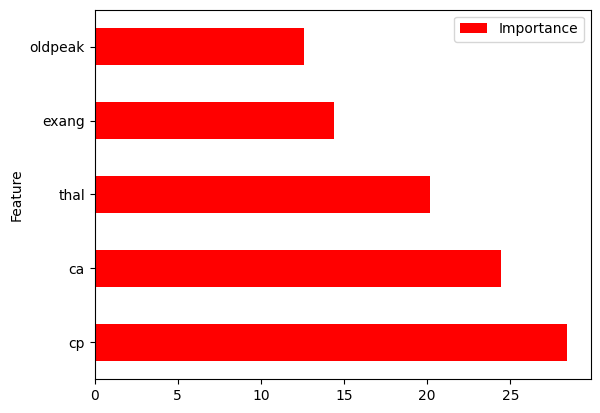

In [56]:
features_df.plot(kind = 'barh', color = 'red', x='Feature')

## AdaBoost Classifier

In [57]:
from sklearn.ensemble import AdaBoostClassifier
BT = AdaBoostClassifier(DecisionTreeClassifier(random_state=1),
                        n_estimators = 100, random_state=1)
BT.fit(train_X,train_y)

pred3 = BT.predict(valid_X)
print(classification_report(valid_y,pred3))

              precision    recall  f1-score   support

           0       0.74      0.83      0.78        30
           1       0.81      0.70      0.75        30

    accuracy                           0.77        60
   macro avg       0.77      0.77      0.77        60
weighted avg       0.77      0.77      0.77        60



In [58]:
BT1 = AdaBoostClassifier(DecisionTreeClassifier(random_state=1),
                        n_estimators = 100, random_state=1)
BT1.fit(X_train_OS, y_train_OS)

out3 = BT1.predict(valid_X)
print(classification_report(valid_y,out3))

              precision    recall  f1-score   support

           0       0.74      0.87      0.80        30
           1       0.84      0.70      0.76        30

    accuracy                           0.78        60
   macro avg       0.79      0.78      0.78        60
weighted avg       0.79      0.78      0.78        60



In [59]:
BT2 = AdaBoostClassifier(DecisionTreeClassifier(random_state=1),
                        n_estimators = 100, random_state=1)
BT2.fit(X_train_US, y_train_US)

out4 = BT2.predict(valid_X)
print(classification_report(valid_y,out4))

              precision    recall  f1-score   support

           0       0.71      0.80      0.75        30
           1       0.77      0.67      0.71        30

    accuracy                           0.73        60
   macro avg       0.74      0.73      0.73        60
weighted avg       0.74      0.73      0.73        60



## RandomForestClassifier

In [60]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators = 500, random_state = 1)
RF.fit(train_X, train_y)

pred4 = RF.predict(valid_X)
print(classification_report(valid_y, pred4))

              precision    recall  f1-score   support

           0       0.76      0.83      0.79        30
           1       0.81      0.73      0.77        30

    accuracy                           0.78        60
   macro avg       0.79      0.78      0.78        60
weighted avg       0.79      0.78      0.78        60



In [61]:
RF1 = RandomForestClassifier(n_estimators = 500, random_state = 1)
RF1.fit(X_train_OS, y_train_OS)

out5 = RF1.predict(valid_X)
print(classification_report(valid_y, out5))

              precision    recall  f1-score   support

           0       0.76      0.83      0.79        30
           1       0.81      0.73      0.77        30

    accuracy                           0.78        60
   macro avg       0.79      0.78      0.78        60
weighted avg       0.79      0.78      0.78        60



In [62]:
RF2 = RandomForestClassifier(n_estimators = 500, random_state = 1)
RF2.fit(X_train_US, y_train_US)

out6 = RF2.predict(valid_X)
print(classification_report(valid_y, out6))

              precision    recall  f1-score   support

           0       0.75      0.80      0.77        30
           1       0.79      0.73      0.76        30

    accuracy                           0.77        60
   macro avg       0.77      0.77      0.77        60
weighted avg       0.77      0.77      0.77        60



In [63]:
imp = RF.feature_importances_
df1 = pd.DataFrame({"Features": train_X.columns, "Importance": imp})
df1 = df1.sort_values('Importance')
print(df1)

  Features  Importance
1    exang    0.107824
3       ca    0.163410
4     thal    0.190099
0       cp    0.268223
2  oldpeak    0.270445


<Axes: ylabel='Features'>

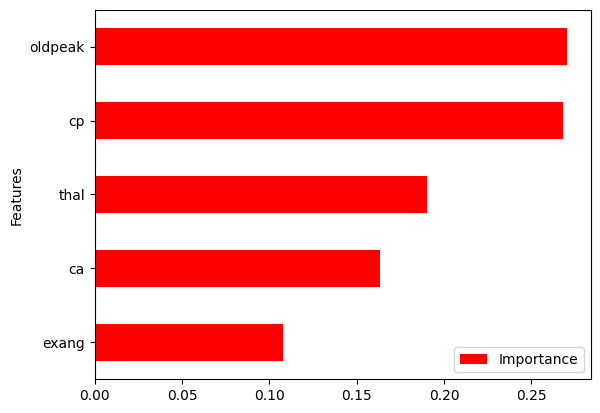

In [64]:
df1.plot(kind = 'barh', color = 'red', x='Features')

## Logistic Regression

In [65]:
lg = LogisticRegression(penalty = 'l2', C = 1e42, solver = 'liblinear')
lg.fit(train_X, train_y)

LogisticRegression(C=1e+42, solver='liblinear')

In [66]:
lpred1 = lg.predict(valid_X)

df1=pd.DataFrame({"Actual": valid_y,
                 "Predicted": lpred1})
print(df1.head(10))
print(classificationSummary(valid_y, lpred1))
print(classification_report(valid_y,lpred1))
print()


     Actual  Predicted
112       0          0
151       0          0
12        1          1
219       0          0
140       0          0
74        1          0
211       1          1
173       0          0
189       1          1
217       0          0
Confusion Matrix (Accuracy 0.8333)

       Prediction
Actual  0  1
     0 27  3
     1  7 23
None
              precision    recall  f1-score   support

           0       0.79      0.90      0.84        30
           1       0.88      0.77      0.82        30

    accuracy                           0.83        60
   macro avg       0.84      0.83      0.83        60
weighted avg       0.84      0.83      0.83        60




In [67]:
lg1 = LogisticRegression(penalty = 'l2', C = 1e42, solver = 'liblinear')
lg1.fit(X_train_OS, y_train_OS)
lpred2 = lg1.predict(valid_X)

df2=pd.DataFrame({"Actual": valid_y,
                 "Predicted": lpred2})
print(df2.head(10))
print(classificationSummary(valid_y, lpred2))
print(classification_report(valid_y,lpred2))
print()

     Actual  Predicted
112       0          0
151       0          0
12        1          1
219       0          0
140       0          0
74        1          0
211       1          1
173       0          0
189       1          1
217       0          0
Confusion Matrix (Accuracy 0.8333)

       Prediction
Actual  0  1
     0 27  3
     1  7 23
None
              precision    recall  f1-score   support

           0       0.79      0.90      0.84        30
           1       0.88      0.77      0.82        30

    accuracy                           0.83        60
   macro avg       0.84      0.83      0.83        60
weighted avg       0.84      0.83      0.83        60




In [68]:
lg2 = LogisticRegression(penalty = 'l2', C = 1e42, solver = 'liblinear')
lg2.fit(X_train_US, y_train_US)
lpred3 = lg2.predict(valid_X)

df3=pd.DataFrame({"Actual": valid_y,
                 "Predicted": lpred3})
print(df3.head(10))
print(classificationSummary(valid_y, lpred3))
print(classification_report(valid_y,lpred3))
print()


     Actual  Predicted
112       0          0
151       0          0
12        1          1
219       0          0
140       0          0
74        1          0
211       1          1
173       0          0
189       1          1
217       0          0
Confusion Matrix (Accuracy 0.8333)

       Prediction
Actual  0  1
     0 27  3
     1  7 23
None
              precision    recall  f1-score   support

           0       0.79      0.90      0.84        30
           1       0.88      0.77      0.82        30

    accuracy                           0.83        60
   macro avg       0.84      0.83      0.83        60
weighted avg       0.84      0.83      0.83        60




## Decision Tree

In [69]:
from sklearn.tree import DecisionTreeClassifier
from dmba import classificationSummary
from dmba import plotDecisionTree

In [70]:
dt = DecisionTreeClassifier()
dt.fit(train_X,train_y)
tpred = dt.predict(valid_X)
df4= pd.DataFrame({"Actual": valid_y, "Predict": tpred})
print(df4.head(10))
print(classificationSummary(valid_y, tpred))
print(classification_report(valid_y,tpred))
print()

     Actual  Predict
112       0        0
151       0        0
12        1        1
219       0        0
140       0        0
74        1        1
211       1        0
173       0        0
189       1        0
217       0        0
Confusion Matrix (Accuracy 0.7833)

       Prediction
Actual  0  1
     0 26  4
     1  9 21
None
              precision    recall  f1-score   support

           0       0.74      0.87      0.80        30
           1       0.84      0.70      0.76        30

    accuracy                           0.78        60
   macro avg       0.79      0.78      0.78        60
weighted avg       0.79      0.78      0.78        60




In [71]:
dt1 = DecisionTreeClassifier()
dt1.fit(X_train_OS, y_train_OS)
tpred2 = dt1.predict(valid_X)
df5= pd.DataFrame({"Actual": valid_y, "Predict": tpred2})
print(df5.head(10))
print(classificationSummary(valid_y, tpred2))
print(classification_report(valid_y,tpred2))
print()

     Actual  Predict
112       0        0
151       0        0
12        1        1
219       0        0
140       0        0
74        1        1
211       1        0
173       0        0
189       1        0
217       0        0
Confusion Matrix (Accuracy 0.7833)

       Prediction
Actual  0  1
     0 25  5
     1  8 22
None
              precision    recall  f1-score   support

           0       0.76      0.83      0.79        30
           1       0.81      0.73      0.77        30

    accuracy                           0.78        60
   macro avg       0.79      0.78      0.78        60
weighted avg       0.79      0.78      0.78        60




In [72]:
dt2 = DecisionTreeClassifier()
dt2.fit(X_train_US, y_train_US)
tpred3 = dt2.predict(valid_X)
df6= pd.DataFrame({"Actual": valid_y, "Predict": tpred3})
print(df6.head(10))
print(classificationSummary(valid_y, tpred3))
print(classification_report(valid_y,tpred3))
print()

     Actual  Predict
112       0        0
151       0        0
12        1        1
219       0        0
140       0        0
74        1        1
211       1        0
173       0        0
189       1        0
217       0        0
Confusion Matrix (Accuracy 0.7833)

       Prediction
Actual  0  1
     0 26  4
     1  9 21
None
              precision    recall  f1-score   support

           0       0.74      0.87      0.80        30
           1       0.84      0.70      0.76        30

    accuracy                           0.78        60
   macro avg       0.79      0.78      0.78        60
weighted avg       0.79      0.78      0.78        60




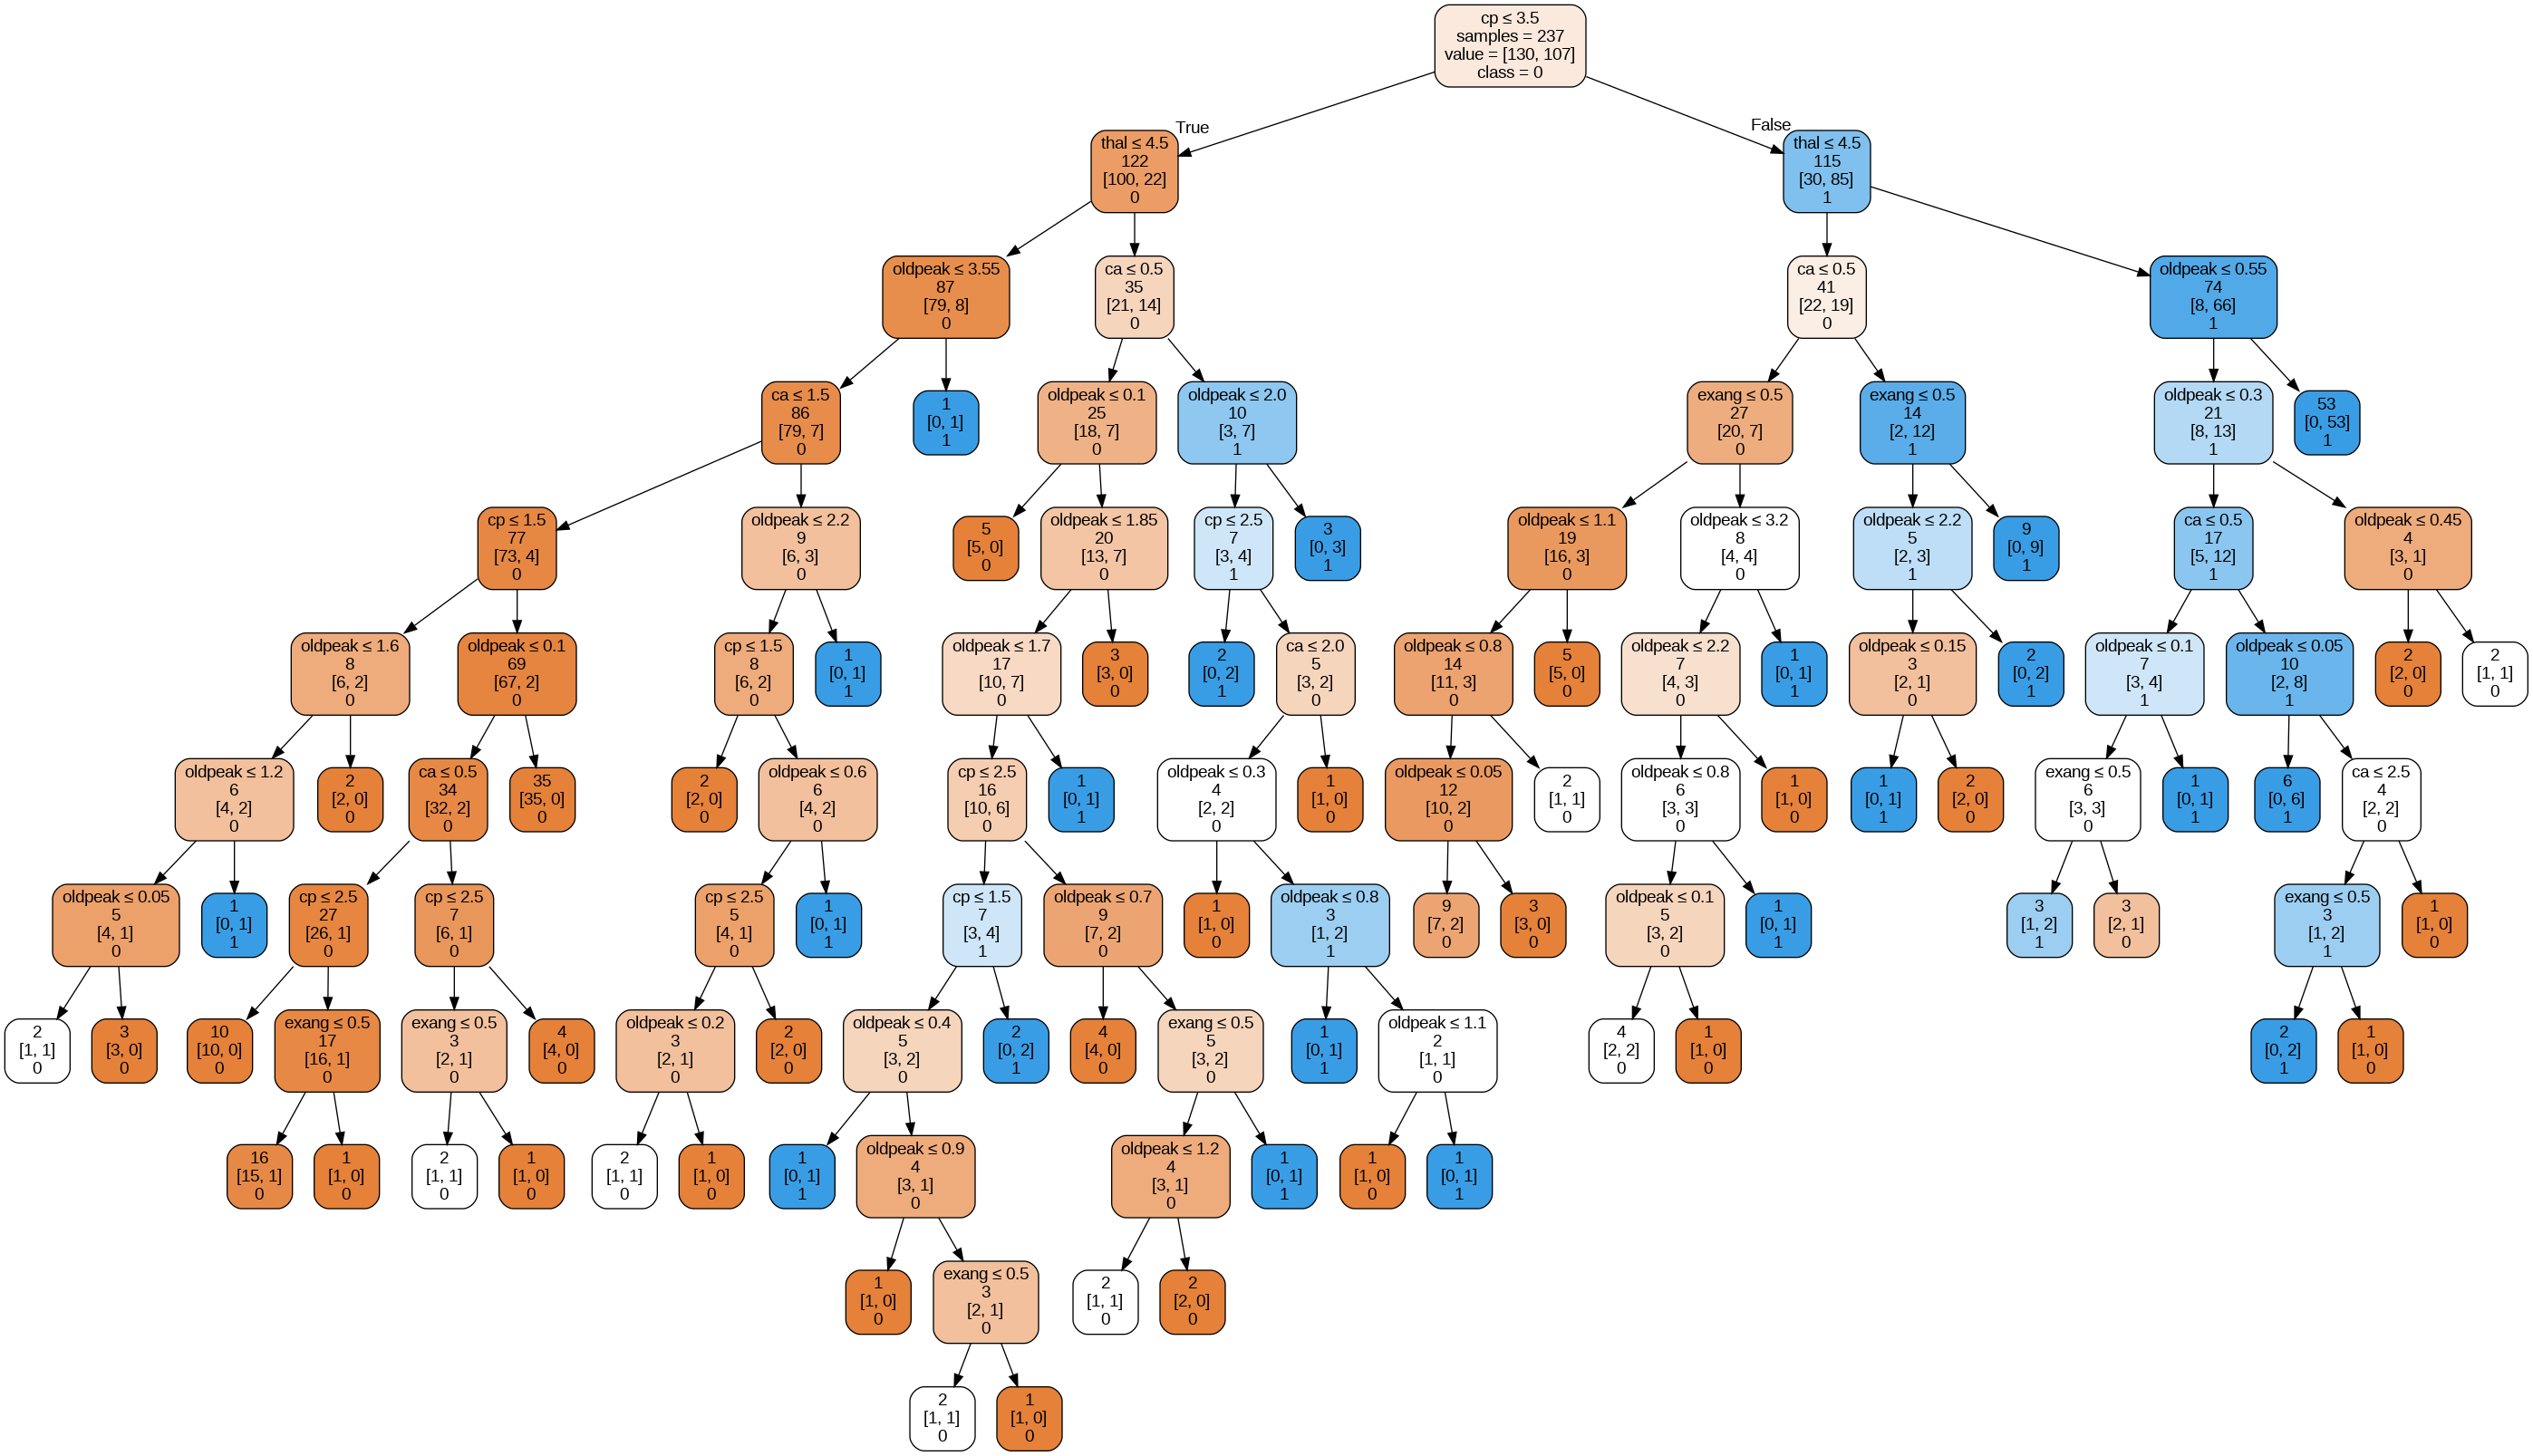

In [73]:
plotDecisionTree(dt, feature_names=train_X.columns, class_names=dt.classes_)

In [74]:
from sklearn.model_selection import GridSearchCV
params = {
    "max_depth": [3,5,10,12,15,18,20,25],
    "min_samples_split" : [20,40,60,100,200],
    "min_impurity_decrease": [0,0.0001,0.005,0.001,0.01]
}
gs= GridSearchCV(DecisionTreeClassifier(random_state=1), params, cv= 5)
gs.fit(train_X, train_y)
print(f"Score: {gs.best_score_}")
print(f'Parameters: {gs.best_params_}')

Score: 0.7804964539007092
Parameters: {'max_depth': 3, 'min_impurity_decrease': 0, 'min_samples_split': 20}


In [75]:
dt4 = DecisionTreeClassifier(max_depth =3, min_impurity_decrease= 0.01, min_samples_split=20)
dt4.fit(train_X,train_y)
tpred4 = dt4.predict(valid_X)
df7= pd.DataFrame({"Actual": valid_y, "Predict": tpred4})

print(df7.head(10))
print(classificationSummary(valid_y,tpred4))
print(classification_report(valid_y,tpred4))

     Actual  Predict
112       0        0
151       0        0
12        1        1
219       0        0
140       0        0
74        1        1
211       1        0
173       0        0
189       1        1
217       0        0
Confusion Matrix (Accuracy 0.8333)

       Prediction
Actual  0  1
     0 26  4
     1  6 24
None
              precision    recall  f1-score   support

           0       0.81      0.87      0.84        30
           1       0.86      0.80      0.83        30

    accuracy                           0.83        60
   macro avg       0.83      0.83      0.83        60
weighted avg       0.83      0.83      0.83        60



In [76]:
dt5 = DecisionTreeClassifier(max_depth =3, min_impurity_decrease= 0, min_samples_split=40)
dt5.fit(X_train_OS, y_train_OS)
tpred5 = dt5.predict(valid_X)
df8= pd.DataFrame({"Actual": valid_y, "Predict": tpred5})
print(df8.head(10))
print(classificationSummary(valid_y,tpred5))
print(classification_report(valid_y,tpred5))

     Actual  Predict
112       0        0
151       0        0
12        1        0
219       0        0
140       0        0
74        1        1
211       1        0
173       0        0
189       1        0
217       0        0
Confusion Matrix (Accuracy 0.7500)

       Prediction
Actual  0  1
     0 27  3
     1 12 18
None
              precision    recall  f1-score   support

           0       0.69      0.90      0.78        30
           1       0.86      0.60      0.71        30

    accuracy                           0.75        60
   macro avg       0.77      0.75      0.74        60
weighted avg       0.77      0.75      0.74        60



In [77]:
dt6 = DecisionTreeClassifier(max_depth =3, min_impurity_decrease= 0, min_samples_split=40)
dt6.fit(X_train_US, y_train_US)
tpred6 = dt6.predict(valid_X)
df9= pd.DataFrame({"Actual": valid_y, "Predict": tpred6})
print(df9.head(10))
print(classificationSummary(valid_y,tpred6))
print(classification_report(valid_y,tpred6))

     Actual  Predict
112       0        0
151       0        0
12        1        0
219       0        0
140       0        0
74        1        0
211       1        0
173       0        0
189       1        0
217       0        0
Confusion Matrix (Accuracy 0.7000)

       Prediction
Actual  0  1
     0 28  2
     1 16 14
None
              precision    recall  f1-score   support

           0       0.64      0.93      0.76        30
           1       0.88      0.47      0.61        30

    accuracy                           0.70        60
   macro avg       0.76      0.70      0.68        60
weighted avg       0.76      0.70      0.68        60



## KNN

In [78]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [79]:
scale = StandardScaler()
X_task1 = pd.DataFrame(scale.fit_transform(X), columns = X.columns)

print(X_task1.info())
print(X_task1.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cp       297 non-null    float64
 1   exang    297 non-null    float64
 2   oldpeak  297 non-null    float64
 3   ca       297 non-null    float64
 4   thal     297 non-null    float64
dtypes: float64(5)
memory usage: 11.7 KB
None
         cp     exang   oldpeak        ca      thal
0 -2.240629 -0.696419  1.068965 -0.721976  0.655877
1  0.873880  1.435916  0.381773  2.478425 -0.894220
2  0.873880  1.435916  1.326662  1.411625  1.172577
3 -0.164289 -0.696419  2.099753 -0.721976 -0.894220
4 -1.202459 -0.696419  0.295874 -0.721976 -0.894220


In [80]:
train_X_scaled, valid_X_scaled,train_y_scaled,valid_y_scaled= train_test_split(X_task1,y,
                                                     test_size=0.2,random_state=0)
overs = SMOTE()
unders= RandomUnderSampler()

X_train_OS_scaled, y_train_OS_scaled= overs.fit_resample(train_X_scaled, train_y_scaled)

X_train_US_scaled, y_train_US_scaled= unders.fit_resample(train_X_scaled,train_y_scaled)

In [81]:
print(train_y_scaled.value_counts())
print()
print(y_train_OS_scaled.value_counts())
print()
print(y_train_US_scaled.value_counts())
print()

num
0    130
1    107
Name: count, dtype: int64

num
1    130
0    130
Name: count, dtype: int64

num
0    107
1    107
Name: count, dtype: int64



In [82]:
k1 = KNeighborsClassifier(n_neighbors= 5)

k1.fit(train_X_scaled, train_y_scaled)

predknn= k1.predict(valid_X_scaled)

KNN1 =pd.DataFrame({"Actual": valid_y_scaled,
                 "Predicted": predknn})

print("Original Sample")
print(KNN1.head(10))
print(classificationSummary(valid_y_scaled,predknn))

print(classification_report(valid_y_scaled,predknn))

Original Sample
     Actual  Predicted
112       0          0
151       0          0
12        1          0
219       0          0
140       0          0
74        1          0
211       1          0
173       0          0
189       1          1
217       0          0
Confusion Matrix (Accuracy 0.7833)

       Prediction
Actual  0  1
     0 27  3
     1 10 20
None
              precision    recall  f1-score   support

           0       0.73      0.90      0.81        30
           1       0.87      0.67      0.75        30

    accuracy                           0.78        60
   macro avg       0.80      0.78      0.78        60
weighted avg       0.80      0.78      0.78        60



In [83]:
k2 = KNeighborsClassifier(n_neighbors= 5)

k2.fit(X_train_OS_scaled, y_train_OS_scaled)

predknn2= k2.predict(valid_X_scaled)

KNN2 =pd.DataFrame({"Actual": valid_y_scaled,
                 "Predicted": predknn2})

print("Over Sample")
print(KNN2.head(10))
print(classificationSummary(valid_y_scaled,predknn2))

print(classification_report(valid_y_scaled,predknn2))

Over Sample
     Actual  Predicted
112       0          0
151       0          0
12        1          0
219       0          0
140       0          0
74        1          0
211       1          0
173       0          0
189       1          1
217       0          0
Confusion Matrix (Accuracy 0.7833)

       Prediction
Actual  0  1
     0 27  3
     1 10 20
None
              precision    recall  f1-score   support

           0       0.73      0.90      0.81        30
           1       0.87      0.67      0.75        30

    accuracy                           0.78        60
   macro avg       0.80      0.78      0.78        60
weighted avg       0.80      0.78      0.78        60



In [84]:
k3 = KNeighborsClassifier(n_neighbors= 5)

k3.fit(X_train_US_scaled, y_train_US_scaled)


predknn3= k3.predict(valid_X_scaled)

KNN3 =pd.DataFrame({"Actual": valid_y_scaled,
                 "Predicted": predknn3})

print("Under Sample")
print(KNN3.head(10))
print(classificationSummary(valid_y_scaled,predknn3))

print(classification_report(valid_y_scaled,predknn3))


Under Sample
     Actual  Predicted
112       0          0
151       0          0
12        1          0
219       0          0
140       0          0
74        1          0
211       1          0
173       0          0
189       1          1
217       0          0
Confusion Matrix (Accuracy 0.7833)

       Prediction
Actual  0  1
     0 27  3
     1 10 20
None
              precision    recall  f1-score   support

           0       0.73      0.90      0.81        30
           1       0.87      0.67      0.75        30

    accuracy                           0.78        60
   macro avg       0.80      0.78      0.78        60
weighted avg       0.80      0.78      0.78        60



In [88]:
for i in range(1,14):
    k1 = KNeighborsClassifier(n_neighbors= i)
    k1.fit(train_X_scaled, train_y_scaled)
    pred1= k1.predict(valid_X_scaled)
    print(f"n_neighbors = {i}")
    print(classification_report(valid_y_scaled,pred1))
    print()
    print()

n_neighbors = 1
              precision    recall  f1-score   support

           0       0.70      0.77      0.73        30
           1       0.74      0.67      0.70        30

    accuracy                           0.72        60
   macro avg       0.72      0.72      0.72        60
weighted avg       0.72      0.72      0.72        60



n_neighbors = 2
              precision    recall  f1-score   support

           0       0.65      0.93      0.77        30
           1       0.88      0.50      0.64        30

    accuracy                           0.72        60
   macro avg       0.77      0.72      0.70        60
weighted avg       0.77      0.72      0.70        60



n_neighbors = 3
              precision    recall  f1-score   support

           0       0.76      0.83      0.79        30
           1       0.81      0.73      0.77        30

    accuracy                           0.78        60
   macro avg       0.79      0.78      0.78        60
weighted avg       0.7

In [86]:

for i in range(1,14):
    k_os = KNeighborsClassifier(n_neighbors= i)
    k_os.fit(X_train_OS_scaled, y_train_OS_scaled)
    pred4= k_os.predict(valid_X_scaled)
    print(f"n_neighbors = {i}")
    print(classification_report(valid_y_scaled,pred4))
    print()
    print()

n_neighbors = 1
              precision    recall  f1-score   support

           0       0.74      0.77      0.75        30
           1       0.76      0.73      0.75        30

    accuracy                           0.75        60
   macro avg       0.75      0.75      0.75        60
weighted avg       0.75      0.75      0.75        60



n_neighbors = 2
              precision    recall  f1-score   support

           0       0.67      0.93      0.78        30
           1       0.89      0.53      0.67        30

    accuracy                           0.73        60
   macro avg       0.78      0.73      0.72        60
weighted avg       0.78      0.73      0.72        60



n_neighbors = 3
              precision    recall  f1-score   support

           0       0.76      0.87      0.81        30
           1       0.85      0.73      0.79        30

    accuracy                           0.80        60
   macro avg       0.81      0.80      0.80        60
weighted avg       0.8

In [87]:

for i in range(1,14):
    k_us = KNeighborsClassifier(n_neighbors= i)
    k_us.fit(X_train_US_scaled, y_train_US_scaled)
    pred5= k_us.predict(valid_X_scaled)
    print(f"n_neighbors = {i}")
    print(classification_report(valid_y_scaled,pred5))
    print()
    print()

n_neighbors = 1
              precision    recall  f1-score   support

           0       0.71      0.83      0.77        30
           1       0.80      0.67      0.73        30

    accuracy                           0.75        60
   macro avg       0.76      0.75      0.75        60
weighted avg       0.76      0.75      0.75        60



n_neighbors = 2
              precision    recall  f1-score   support

           0       0.65      0.93      0.77        30
           1       0.88      0.50      0.64        30

    accuracy                           0.72        60
   macro avg       0.77      0.72      0.70        60
weighted avg       0.77      0.72      0.70        60



n_neighbors = 3
              precision    recall  f1-score   support

           0       0.76      0.87      0.81        30
           1       0.85      0.73      0.79        30

    accuracy                           0.80        60
   macro avg       0.81      0.80      0.80        60
weighted avg       0.8

## Naive Bayes

In [89]:
from sklearn.naive_bayes import GaussianNB

array([[<Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'exang'}>],
       [<Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'ca'}>],
       [<Axes: title={'center': 'thal'}>, <Axes: >]], dtype=object)

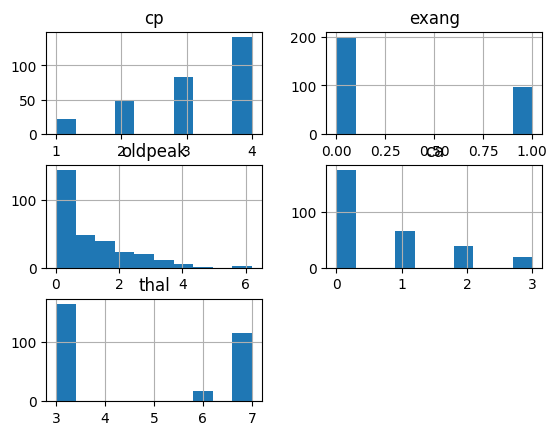

In [90]:
X.hist()

In [91]:
from scipy.stats import norm

df['age'] = norm.cdf(df['age'])
df['sex'] = norm.cdf(df['sex'])
df['cp'] = norm.cdf(df['cp'])
df['trestbps'] = norm.cdf(df['trestbps'])
df['chol'] = norm.cdf(df['chol'])
df['fbs'] = norm.cdf(df['fbs'])
df['restecg'] = norm.cdf(df['restecg'])
df['exang'] = norm.cdf(df['exang'])
df['oldpeak'] = norm.cdf(df['oldpeak'])
df['slope'] = norm.cdf(df['slope'])
df['ca'] = norm.cdf(df['ca'])
df['thal'] = norm.cdf(df['thal'])

In [92]:
X_norm = df[['age','cp','oldpeak','ca','thal' ]]
y_norm= df['num']

In [93]:
train_X_norm,valid_X_norm,train_y_norm,valid_y_norm = train_test_split(X_norm,y_norm,test_size=0.2, random_state=0)

overs=SMOTE()
unders=RandomUnderSampler(sampling_strategy='majority')

X_train_OS_norm,y_train_OS_norm= overs.fit_resample(train_X_norm,train_y_norm)

X_train_US_norm,y_train_US_norm= unders.fit_resample(train_X_norm,train_y_norm)

In [94]:
nb1_norm=GaussianNB()
nb1_norm.fit(train_X_norm,train_y_norm)

pred_nd1_norm= nb1_norm.predict(valid_X_norm)
df1_norm= pd.DataFrame({'Actual':valid_y_norm,
                   'Predicted':pred_nd1_norm})
print(df1_norm.head(10))
print(classificationSummary(valid_y_norm, pred_nd1_norm))
print(classification_report(valid_y_norm, pred_nd1_norm))

     Actual  Predicted
112       0          0
151       0          0
12        1          1
219       0          0
140       0          0
74        1          0
211       1          0
173       0          0
189       1          1
217       0          0
Confusion Matrix (Accuracy 0.8167)

       Prediction
Actual  0  1
     0 27  3
     1  8 22
None
              precision    recall  f1-score   support

           0       0.77      0.90      0.83        30
           1       0.88      0.73      0.80        30

    accuracy                           0.82        60
   macro avg       0.83      0.82      0.82        60
weighted avg       0.83      0.82      0.82        60



In [95]:
nb2_norm=GaussianNB()
nb2_norm.fit(X_train_OS_norm,y_train_OS_norm)

pred_nd2_norm= nb2_norm.predict(valid_X_norm)
df2_norm= pd.DataFrame({'Actual':valid_y_norm,
                   'Predicted':pred_nd2_norm})
print(df2_norm.head(10))
print(classificationSummary(valid_y_norm, pred_nd2_norm))
print(classification_report(valid_y_norm, pred_nd2_norm))

     Actual  Predicted
112       0          0
151       0          0
12        1          1
219       0          0
140       0          0
74        1          0
211       1          0
173       0          0
189       1          1
217       0          0
Confusion Matrix (Accuracy 0.8167)

       Prediction
Actual  0  1
     0 27  3
     1  8 22
None
              precision    recall  f1-score   support

           0       0.77      0.90      0.83        30
           1       0.88      0.73      0.80        30

    accuracy                           0.82        60
   macro avg       0.83      0.82      0.82        60
weighted avg       0.83      0.82      0.82        60



In [96]:
nb3_norm=GaussianNB()
nb3_norm.fit(X_train_US_norm,y_train_US_norm)

pred_nd3_norm= nb3_norm.predict(valid_X_norm)
df3_norm= pd.DataFrame({'Actual':valid_y_norm,
                   'Predicted':pred_nd3_norm})
print(df3_norm.head(10))
print(classificationSummary(valid_y_norm, pred_nd3_norm))
print(classification_report(valid_y_norm, pred_nd3_norm))

     Actual  Predicted
112       0          0
151       0          0
12        1          1
219       0          0
140       0          0
74        1          0
211       1          0
173       0          0
189       1          1
217       0          0
Confusion Matrix (Accuracy 0.8000)

       Prediction
Actual  0  1
     0 27  3
     1  9 21
None
              precision    recall  f1-score   support

           0       0.75      0.90      0.82        30
           1       0.88      0.70      0.78        30

    accuracy                           0.80        60
   macro avg       0.81      0.80      0.80        60
weighted avg       0.81      0.80      0.80        60



## Neural Nets

In [97]:
from sklearn.neural_network import MLPClassifier

In [98]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_X_nn = scaler.fit_transform(train_X)
train_X_nn = pd.DataFrame(train_X_nn, columns = X.columns)
train_X_nn.head()

,cp,exang,oldpeak,ca,thal
0,1.000000,1.0,0.451613,0.666667,0.75
1,1.000000,0.0,0.064516,0.000000,0.00
2,1.000000,0.0,0.193548,0.000000,1.00
3,0.666667,0.0,0.000000,0.000000,0.00
4,0.666667,1.0,0.000000,0.000000,0.00


In [99]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
valid_X_nn = scaler.fit_transform(valid_X)
valid_X_nn = pd.DataFrame(valid_X_nn, columns = X.columns)
valid_X_nn.head()

,cp,exang,oldpeak,ca,thal
0,0.000000,0.0,0.000000,0.000000,0.75
1,1.000000,0.0,0.107143,0.000000,0.00
2,0.666667,1.0,0.107143,0.333333,0.75
3,1.000000,0.0,0.000000,0.000000,0.00
4,0.333333,1.0,0.000000,0.000000,0.00


In [100]:
nn = MLPClassifier(hidden_layer_sizes=(6,5,4,3),activation= 'relu', solver= 'sgd', learning_rate= 'constant',
                   learning_rate_init= 0.05,max_iter=500,warm_start=True)
model =nn.fit(train_X_nn, train_y)
predict = model.predict(valid_X_nn)
print(predict)
print(classification_report(valid_y,predict))

[0 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 1 0 1 1 1 1 0 1 0 0 0 0 0 0 1 0 1 1 0 1 0
 1 1 0 0 1 0 0 1 1 1 0 0 0 1 1 1 0 0 1 0 1 0 0]
              precision    recall  f1-score   support

           0       0.76      0.87      0.81        30
           1       0.85      0.73      0.79        30

    accuracy                           0.80        60
   macro avg       0.81      0.80      0.80        60
weighted avg       0.81      0.80      0.80        60



In [101]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_X_nn = scaler.fit_transform(X_train_OS)
train_X_nn = pd.DataFrame(train_X_nn, columns = X.columns)
train_X_nn.head()

,cp,exang,oldpeak,ca,thal
0,1.000000,1.0,0.451613,0.666667,0.75
1,1.000000,0.0,0.064516,0.000000,0.00
2,1.000000,0.0,0.193548,0.000000,1.00
3,0.666667,0.0,0.000000,0.000000,0.00
4,0.666667,1.0,0.000000,0.000000,0.00


In [102]:
nn = MLPClassifier(hidden_layer_sizes=(6,5,4,3),activation= 'relu', solver= 'adam', learning_rate= 'constant',
                   learning_rate_init= 0.05,max_iter=500,warm_start=True)
model =nn.fit(train_X_nn, y_train_OS)
predict = model.predict(valid_X_nn)
print(predict)
print(classification_report(valid_y,predict))

[0 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 1 0 1 1 1 1 0 1 0 0 0 0 0 0 1 0 1 1 0 1 0
 1 1 0 0 1 0 0 1 1 1 0 0 0 1 1 1 0 0 1 0 1 0 0]
              precision    recall  f1-score   support

           0       0.76      0.87      0.81        30
           1       0.85      0.73      0.79        30

    accuracy                           0.80        60
   macro avg       0.81      0.80      0.80        60
weighted avg       0.81      0.80      0.80        60



In [103]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_X_nn = scaler.fit_transform(X_train_US)
train_X_nn = pd.DataFrame(train_X_nn, columns = X.columns)
train_X_nn.head()

,cp,exang,oldpeak,ca,thal
0,0.666667,0.0,0.000000,0.333333,0.0
1,1.000000,0.0,0.000000,0.000000,0.0
2,0.000000,0.0,0.419355,0.000000,0.0
3,0.666667,0.0,0.048387,0.333333,0.0
4,0.666667,0.0,0.241935,0.333333,0.0


In [104]:
nn = MLPClassifier(hidden_layer_sizes=(6,5,4,3),activation= 'relu', solver= 'adam', learning_rate= 'constant',
                   learning_rate_init= 0.05,max_iter=500,warm_start=True)
model =nn.fit(train_X_nn, y_train_US)
predict = model.predict(valid_X_nn)
print(predict)
print(classification_report(valid_y,predict))

[0 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 1 0 1 1 1 1 0 1 0 0 0 0 0 0 1 0 1 1 0 1 0
 1 1 0 0 1 0 0 0 1 1 0 0 0 1 1 1 0 0 1 0 1 0 0]
              precision    recall  f1-score   support

           0       0.77      0.90      0.83        30
           1       0.88      0.73      0.80        30

    accuracy                           0.82        60
   macro avg       0.83      0.82      0.82        60
weighted avg       0.83      0.82      0.82        60



## XGBoost

In [105]:
pip install xgboost


In [106]:
# Count the number of unique classes
num_classes = len(set(train_y))
print(num_classes)

2


In [107]:
import xgboost as xgb
import numpy as np


# Initialize an XGBoost classifier
clf = xgb.XGBClassifier(objective='multi:softprob', eval_metric='mlogloss',num_class=num_classes)

# Fit the classifier to the training data
clf.fit(train_X,train_y)

# Make predictions
predictions = clf.predict(valid_X)

# Convert predictions from probabilities to labels if they are probabilities
if predictions.ndim > 1 and predictions.shape[1] > 1:
    predictions = np.argmax(predictions, axis=1)

# Convert valid_y from one-hot encoded to labels if it is one-hot encoded
if valid_y.ndim > 1 and valid_y.shape[1] > 1:
    valid_y = np.argmax(valid_y, axis=1)

# Optionally, check the accuracy
dataframe= pd.DataFrame({'Actual':valid_y,
                   'Predicted':predictions})
print(dataframe.head(10))
print(classificationSummary(valid_y, predictions))
print(classification_report(valid_y, predictions))


     Actual  Predicted
112       0          0
151       0          0
12        1          0
219       0          0
140       0          0
74        1          1
211       1          0
173       0          0
189       1          1
217       0          1
Confusion Matrix (Accuracy 0.7667)

       Prediction
Actual  0  1
     0 25  5
     1  9 21
None
              precision    recall  f1-score   support

           0       0.74      0.83      0.78        30
           1       0.81      0.70      0.75        30

    accuracy                           0.77        60
   macro avg       0.77      0.77      0.77        60
weighted avg       0.77      0.77      0.77        60



In [108]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

clf = XGBClassifier()
parameters = {
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1]
}
grid_search = GridSearchCV(estimator=clf, param_grid=parameters, scoring='accuracy', cv=3)
grid_search.fit(train_X,train_y)
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)


Best parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
Best score: 0.8227848101265822


In [109]:
import xgboost as xgb
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report

# Assuming num_classes is defined somewhere in your code, and train_X, train_y, valid_X, and valid_y are defined
num_classes = 2  # Adjust this based on your actual number of classes

# Initialize an XGBoost classifier
clf = xgb.XGBClassifier(objective='multi:softprob', eval_metric='mlogloss',
                        num_class=num_classes, learning_rate=0.1, max_depth=3, n_estimators=100)

# Fit the classifier to the training data
clf.fit(train_X, train_y)

# Make predictions
predictions = clf.predict(valid_X)

# Convert predictions from probabilities to labels if they are probabilities
if predictions.ndim > 1 and predictions.shape[1] > 1:
    predictions = np.argmax(predictions, axis=1)

# Convert valid_y from one-hot encoded to labels if it is one-hot encoded
if valid_y.ndim > 1 and valid_y.shape[1] > 1:
    valid_y = np.argmax(valid_y, axis=1)

# Optionally, check the accuracy
dataframe = pd.DataFrame({'Actual': valid_y, 'Predicted': predictions})
print(dataframe.head(10))
print(classificationSummary(valid_y, predictions))
print(classification_report(valid_y, predictions))


     Actual  Predicted
112       0          0
151       0          0
12        1          0
219       0          0
140       0          0
74        1          1
211       1          1
173       0          0
189       1          0
217       0          0
Confusion Matrix (Accuracy 0.7833)

       Prediction
Actual  0  1
     0 27  3
     1 10 20
None
              precision    recall  f1-score   support

           0       0.73      0.90      0.81        30
           1       0.87      0.67      0.75        30

    accuracy                           0.78        60
   macro avg       0.80      0.78      0.78        60
weighted avg       0.80      0.78      0.78        60



In [110]:
import xgboost as xgb
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report

# Assuming num_classes is defined somewhere in your code, and train_X, train_y, valid_X, and valid_y are defined
num_classes = 2  # Adjust this based on your actual number of classes

# Initialize an XGBoost classifier
clf = xgb.XGBClassifier(objective='multi:softprob', eval_metric='mlogloss',
                        num_class=num_classes, learning_rate=0.1, max_depth=3, n_estimators=100)

# Fit the classifier to the training data
clf.fit(X_train_OS,y_train_OS)

# Make predictions
predictions = clf.predict(valid_X)

# Convert predictions from probabilities to labels if they are probabilities
if predictions.ndim > 1 and predictions.shape[1] > 1:
    predictions = np.argmax(predictions, axis=1)

# Convert valid_y from one-hot encoded to labels if it is one-hot encoded
if valid_y.ndim > 1 and valid_y.shape[1] > 1:
    valid_y = np.argmax(valid_y, axis=1)

dataframe = pd.DataFrame({'Actual': valid_y, 'Predicted': predictions})
print(dataframe.head(10))
print(classificationSummary(valid_y, predictions))
print(classification_report(valid_y, predictions))


     Actual  Predicted
112       0          0
151       0          0
12        1          1
219       0          0
140       0          0
74        1          1
211       1          0
173       0          0
189       1          0
217       0          0
Confusion Matrix (Accuracy 0.7833)

       Prediction
Actual  0  1
     0 27  3
     1 10 20
None
              precision    recall  f1-score   support

           0       0.73      0.90      0.81        30
           1       0.87      0.67      0.75        30

    accuracy                           0.78        60
   macro avg       0.80      0.78      0.78        60
weighted avg       0.80      0.78      0.78        60



In [111]:
import xgboost as xgb
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report

# Assuming num_classes is defined somewhere in your code, and train_X, train_y, valid_X, and valid_y are defined
num_classes = 2  # Adjust this based on your actual number of classes

# Initialize an XGBoost classifier
clf = xgb.XGBClassifier(objective='multi:softprob', eval_metric='mlogloss',
                        num_class=num_classes, learning_rate=0.1, max_depth=3, n_estimators=100)

# Fit the classifier to the training data
clf.fit(X_train_US,y_train_US)

# Make predictions
predictions = clf.predict(valid_X)

# Convert predictions from probabilities to labels if they are probabilities
if predictions.ndim > 1 and predictions.shape[1] > 1:
    predictions = np.argmax(predictions, axis=1)

# Convert valid_y from one-hot encoded to labels if it is one-hot encoded
if valid_y.ndim > 1 and valid_y.shape[1] > 1:
    valid_y = np.argmax(valid_y, axis=1)

dataframe = pd.DataFrame({'Actual': valid_y, 'Predicted': predictions})
print(dataframe.head(10))
print(classificationSummary(valid_y, predictions))
print(classification_report(valid_y, predictions))


     Actual  Predicted
112       0          0
151       0          0
12        1          0
219       0          0
140       0          0
74        1          1
211       1          1
173       0          0
189       1          0
217       0          0
Confusion Matrix (Accuracy 0.7667)

       Prediction
Actual  0  1
     0 26  4
     1 10 20
None
              precision    recall  f1-score   support

           0       0.72      0.87      0.79        30
           1       0.83      0.67      0.74        30

    accuracy                           0.77        60
   macro avg       0.78      0.77      0.76        60
weighted avg       0.78      0.77      0.76        60



## SVM

In [112]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_X_scaled = scaler.fit_transform(train_X)
valid_X_scaled = scaler.transform(valid_X)

# Initialize SVM classifier
svm_clf = SVC(kernel='rbf')  # You can change the kernel to 'rbf', 'poly', 'linear etc., depending on your needs

# Fit the classifier to the scaled training data
svm_clf.fit(train_X_scaled, train_y)

# Make predictions on the scaled validation data
predictions = svm_clf.predict(valid_X_scaled)


dataframe = pd.DataFrame({'Actual': valid_y, 'Predicted': predictions})
print(dataframe.head(10))
print(classificationSummary(valid_y, predictions))
print("Classification Report:")
print(classification_report(valid_y, predictions))


     Actual  Predicted
112       0          0
151       0          0
12        1          1
219       0          0
140       0          0
74        1          0
211       1          0
173       0          0
189       1          1
217       0          1
Confusion Matrix (Accuracy 0.7500)

       Prediction
Actual  0  1
     0 25  5
     1 10 20
None
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.83      0.77        30
           1       0.80      0.67      0.73        30

    accuracy                           0.75        60
   macro avg       0.76      0.75      0.75        60
weighted avg       0.76      0.75      0.75        60



In [113]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_X_scaled = scaler.fit_transform(X_train_OS)
valid_X_scaled = scaler.transform(valid_X)

# Initialize SVM classifier
svm_clf = SVC(kernel='rbf')  # You can change the kernel to 'rbf', 'poly', 'linear etc., depending on your needs

# Fit the classifier to the scaled training data
svm_clf.fit(train_X_scaled, y_train_OS)

# Make predictions on the scaled validation data
predictions = svm_clf.predict(valid_X_scaled)


dataframe = pd.DataFrame({'Actual': valid_y, 'Predicted': predictions})
print(dataframe.head(10))
print(classificationSummary(valid_y, predictions))
print("Classification Report:")
print(classification_report(valid_y, predictions))


     Actual  Predicted
112       0          0
151       0          0
12        1          1
219       0          0
140       0          0
74        1          0
211       1          0
173       0          0
189       1          1
217       0          1
Confusion Matrix (Accuracy 0.7833)

       Prediction
Actual  0  1
     0 25  5
     1  8 22
None
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.83      0.79        30
           1       0.81      0.73      0.77        30

    accuracy                           0.78        60
   macro avg       0.79      0.78      0.78        60
weighted avg       0.79      0.78      0.78        60



In [114]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_X_scaled = scaler.fit_transform(X_train_US)
valid_X_scaled = scaler.transform(valid_X)

# Initialize SVM classifier
svm_clf = SVC(kernel='rbf')  # You can change the kernel to 'rbf', 'poly', 'linear etc., depending on your needs

# Fit the classifier to the scaled training data
svm_clf.fit(train_X_scaled,y_train_US)

# Make predictions on the scaled validation data
predictions = svm_clf.predict(valid_X_scaled)


dataframe = pd.DataFrame({'Actual': valid_y, 'Predicted': predictions})
print(dataframe.head(10))
print(classificationSummary(valid_y, predictions))
print("Classification Report:")
print(classification_report(valid_y, predictions))


     Actual  Predicted
112       0          0
151       0          0
12        1          1
219       0          0
140       0          0
74        1          0
211       1          0
173       0          0
189       1          1
217       0          0
Confusion Matrix (Accuracy 0.7833)

       Prediction
Actual  0  1
     0 26  4
     1  9 21
None
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.87      0.80        30
           1       0.84      0.70      0.76        30

    accuracy                           0.78        60
   macro avg       0.79      0.78      0.78        60
weighted avg       0.79      0.78      0.78        60



## Discrimanant Analysis

In [115]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(train_X, train_y)
predictions = lda.predict(valid_X)
dataframe = pd.DataFrame({'Actual': valid_y, 'Predicted': predictions})
print(dataframe.head(10))
print(classificationSummary(valid_y, predictions))
print("Classification Report:")
print(classification_report(valid_y, predictions))


     Actual  Predicted
112       0          0
151       0          0
12        1          1
219       0          0
140       0          0
74        1          0
211       1          1
173       0          0
189       1          1
217       0          0
Confusion Matrix (Accuracy 0.8167)

       Prediction
Actual  0  1
     0 27  3
     1  8 22
None
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.90      0.83        30
           1       0.88      0.73      0.80        30

    accuracy                           0.82        60
   macro avg       0.83      0.82      0.82        60
weighted avg       0.83      0.82      0.82        60



In [116]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_OS,y_train_OS)
predictions = lda.predict(valid_X)
dataframe = pd.DataFrame({'Actual': valid_y, 'Predicted': predictions})
print(dataframe.head(10))
print(classificationSummary(valid_y, predictions))
print("Classification Report:")
print(classification_report(valid_y, predictions))


     Actual  Predicted
112       0          0
151       0          0
12        1          1
219       0          0
140       0          0
74        1          0
211       1          1
173       0          0
189       1          1
217       0          0
Confusion Matrix (Accuracy 0.8333)

       Prediction
Actual  0  1
     0 27  3
     1  7 23
None
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.90      0.84        30
           1       0.88      0.77      0.82        30

    accuracy                           0.83        60
   macro avg       0.84      0.83      0.83        60
weighted avg       0.84      0.83      0.83        60



In [117]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_US,y_train_US)
predictions = lda.predict(valid_X)
dataframe = pd.DataFrame({'Actual': valid_y, 'Predicted': predictions})
print(dataframe.head(10))
print(classificationSummary(valid_y, predictions))
print("Classification Report:")
print(classification_report(valid_y, predictions))


     Actual  Predicted
112       0          0
151       0          0
12        1          1
219       0          0
140       0          0
74        1          0
211       1          1
173       0          0
189       1          1
217       0          0
Confusion Matrix (Accuracy 0.8333)

       Prediction
Actual  0  1
     0 27  3
     1  7 23
None
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.90      0.84        30
           1       0.88      0.77      0.82        30

    accuracy                           0.83        60
   macro avg       0.84      0.83      0.83        60
weighted avg       0.84      0.83      0.83        60



## Quadratic LDA

In [118]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis()
qda.fit(train_X, train_y)
predictions = qda.predict(valid_X)
dataframe = pd.DataFrame({'Actual': valid_y, 'Predicted': predictions})
print(dataframe.head(10))
print(classificationSummary(valid_y, predictions))
print("Classification Report:")
print(classification_report(valid_y, predictions))

     Actual  Predicted
112       0          0
151       0          0
12        1          1
219       0          0
140       0          0
74        1          0
211       1          0
173       0          0
189       1          1
217       0          0
Confusion Matrix (Accuracy 0.7667)

       Prediction
Actual  0  1
     0 26  4
     1 10 20
None
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.87      0.79        30
           1       0.83      0.67      0.74        30

    accuracy                           0.77        60
   macro avg       0.78      0.77      0.76        60
weighted avg       0.78      0.77      0.76        60



In [119]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train_OS,y_train_OS)
predictions = qda.predict(valid_X)
dataframe = pd.DataFrame({'Actual': valid_y, 'Predicted': predictions})
print(dataframe.head(10))
print(classificationSummary(valid_y, predictions))
print("Classification Report:")
print(classification_report(valid_y, predictions))

     Actual  Predicted
112       0          0
151       0          0
12        1          1
219       0          0
140       0          0
74        1          0
211       1          0
173       0          0
189       1          1
217       0          1
Confusion Matrix (Accuracy 0.7667)

       Prediction
Actual  0  1
     0 25  5
     1  9 21
None
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.83      0.78        30
           1       0.81      0.70      0.75        30

    accuracy                           0.77        60
   macro avg       0.77      0.77      0.77        60
weighted avg       0.77      0.77      0.77        60



In [120]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train_US,y_train_US)
predictions = qda.predict(valid_X)
dataframe = pd.DataFrame({'Actual': valid_y, 'Predicted': predictions})
print(dataframe.head(10))
print(classificationSummary(valid_y, predictions))
print("Classification Report:")
print(classification_report(valid_y, predictions))

     Actual  Predicted
112       0          0
151       0          0
12        1          1
219       0          0
140       0          0
74        1          0
211       1          0
173       0          0
189       1          1
217       0          1
Confusion Matrix (Accuracy 0.7667)

       Prediction
Actual  0  1
     0 25  5
     1  9 21
None
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.83      0.78        30
           1       0.81      0.70      0.75        30

    accuracy                           0.77        60
   macro avg       0.77      0.77      0.77        60
weighted avg       0.77      0.77      0.77        60

